## ANLY 502; Group 17 

## Final Project Deliverable 1: EDA

## HEALTHCARE ANALYSIS USING REDDIT DATA

Jake Steinfink, Morgan Lopez, Cornelia Thomas, Sophia Elliott

In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")

Out[215]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_committed_6430546272860639810', name='_committed_6430546272860639810', size=4681232, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_started_6430546272860639810', name='_started_6430546272860639810', size=0, modificationTime=1666559125000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', name='part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', size=18145455, modificationTime=1666557337000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.n

In [0]:
comments = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")
submissions = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions")

In [0]:
comments_row_count = comments.count()
comment_col_count = len(comments.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

shape of the comments dataframe is 4,473,556,762x21


In [0]:
comments.show()

+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|            author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|        FieldOfFox|          null|                  null|                null|  Music taste is bad|    true|               

In [0]:
comments.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
submissions_row_count = submissions.count()
submissions_col_count = len(submissions.columns)
print(f"shape of the submissions dataframe is {submissions_row_count:,}x{submissions_col_count}")

shape of the submissions dataframe is 643,255,528x68


In [0]:
submissions.show()

+------------------+------------------+--------+-----------------+--------------+----------------------+--------------------+---------+----------+------------+-----------+----------------+---------------------+----------------+-------------+--------------------+---------------+------+----------+---------+------+------+----------+--------+------+---------+----------------+----------------------+-------+--------+--------------------+--------------------+------+--------------------+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+------------+--------------------+--------+-----------+---------------------+------------+------------+-----+--------------------+--------------------+--------------------+-------+--------+------------------+------------+--------------+--------------------+--------------------+----------------------+--------------------+----------------+---------------+--------------------+---

In [0]:
submissions.printSchema()

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

## Choosing a Topic - Healthcare

In [0]:
from pyspark.sql.functions import col,isnan, when, count

## Skip to here to read in Healthcare Subreddit data

In [0]:
healthcare_sub = spark.read.parquet("/FileStore/healthcare_subsv2")
healthcare_com = spark.read.parquet("/FileStore/healthcare_comsv2")

### Display shape of healthcare subreddit submissions and comments

In [0]:
sub_count = healthcare_sub.count()
sub_col_count = len(healthcare_sub.columns)
print(f"shape of the healthcare subreddit submissions dataframe is {sub_count:,}x{sub_col_count}")

shape of the healthcare subreddit submissions dataframe is 28,479x68


In [0]:
com_count = healthcare_com.count()
com_col_count = len(healthcare_com.columns)
print(f"shape of the healthcare comments dataframe is {com_count:,}x{com_col_count}")

shape of the healthcare comments dataframe is 41,827x21


### Healthcare subreddit Data Quality Checks - missing values

In [0]:
## Submissions first

# Columns of boolean or array type cause failuers when checking nulls, so must remove those columns from  # the analysis
columns_with_bad_dtypes = [c for (c, c_type) in healthcare_sub.dtypes if c_type not in ['string','long','bigint']]

healthcare_sub.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in healthcare_sub.columns if c not in columns_with_bad_dtypes]).show()

+------------------+------------------+------+----------------------+-----------------+---------+-----------+----------------+-------------+------+---------------+------+----------+---------+------+--------+---+---------+--------------------+---------------+-------------+------------+--------------+-------------+-----------------------+---------+---------+-----------+---------------------+------------+------------+-----+--------+---------+------------+--------------+--------------------+----------------------+---------+----------------+---------------+-----+---+----------------+
|adserver_click_url|adserver_imp_pixel|author|author_flair_css_class|author_flair_text|author_id|created_utc|crosspost_parent|distinguished|domain|domain_override|edited|embed_type|embed_url|gilded|href_url| id|imp_pixel|link_flair_css_class|link_flair_text|mobile_ad_url|num_comments|num_crossposts|original_link|parent_whitelist_status|permalink|post_hint|promoted_by|promoted_display_name|promoted_url|retrieved

In [0]:
## Missing values counts for comments df
columns_with_bad_dtypes = [c for (c, c_type) in healthcare_com.dtypes if c_type not in ['string', 'long', 'bigint']]

healthcare_com.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in healthcare_com.columns if c not in columns_with_bad_dtypes]).show()

+------+----------------------+-----------------+----+----------------+-----------+-------------+------+------+---+-------+---------+---------+------------+-----+---------+------------+
|author|author_flair_css_class|author_flair_text|body|controversiality|created_utc|distinguished|edited|gilded| id|link_id|parent_id|permalink|retrieved_on|score|subreddit|subreddit_id|
+------+----------------------+-----------------+----+----------------+-----------+-------------+------+------+---+-------+---------+---------+------------+-----+---------+------------+
|     0|                 41049|            40765|   0|               0|          0|        18678|     0|     0|  0|      0|        0|        0|       10091|    0|        0|           0|
+------+----------------------+-----------------+----+----------------+-----------+-------------+------+------+---+-------+---------+---------+------------+-----+---------+------------+



## Exploratory Data Analysis

In [0]:
## create a directory called data/plots to save generated data
import os
PLOT_DIR = os.path.join("data", "plots")
CSV_DIR = os.path.join("data","csv")
os.makedirs(PLOT_DIR, exist_ok=True)

## Business Question 1:

`Business Goal:` Determine the likelihood of getting a response to a general health question on Reddit. This would help quantify the usefulness of this subreddit in terms of offering responses/answers to people seeking advice on health-related topics. When choosing a subreddit in which to post, knowing your likelihood of recieving a response is extremely useful information to inform your choice to engage with one specific subreddit over another.

`Technical Proposal:` Using the subreddit AskReddit, examine the likelihood of a response. Compute the distribution of number of comments per post. Examine whether the length of the submission impacts the likelihood of receiving a response. Will perform bootstrap sampling to determine an expected number of comments per submission as well as an associated confidence interval. Present findings as an expected number of comments on a submission to r/healthcare.

In [0]:
comments_dist = healthcare_sub.select(col('num_comments')).toPandas()

##### Figure 1

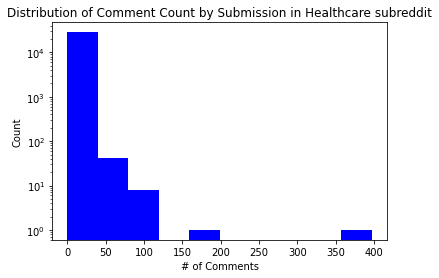

In [0]:
import matplotlib.pyplot as plt
plt.hist("num_comments", data = comments_dist, log = True, color = "blue")
plt.xlabel("# of Comments")
plt.ylabel("Count")
plt.title(f"Distribution of Comment Count by Submission in Healthcare subreddit")
plot_fpath = os.path.join(PLOT_DIR, f'comments_dist_submissions_healthcare.png')
plt.savefig(plot_fpath)
plt.show()

This image shows the common quanitites of comments on a submission in the health care subreddit. We can see that the vast majority of posts receive 0-50 comments, but some do garner significantly more engagement.

In [0]:
## Saving the data used to create the graph
csv_fpath = os.path.join(CSV_DIR, f'comments_dist_submission_healthcare.csv')
comments_dist.to_csv(csv_fpath)

## Business Question 2:

`Business Goal:` Determine the expected diversity of responses (variety of unique authors) on a general health-related question posed to Reddit. Author diversity analysis will serve as a metric for evaluating the breadth and depth of information available on the healthcare subreddit. This will help establish the viability of this subreddit as a health information forum.

`Technical Proposal:` Using the healthcare subreddit, examine the diversity of replies in terms of who is generating the responses and the average quality of their responses. This entails computing the distribution of activity by author, determining leaders, and computing their average response length. This helps avoid the issue of a spam person putting a bunch of one word responses to questions. Present findings as a table of top n authors - the % of total responses they are responsible for, and their average response length.

In [0]:
author_dist = healthcare_com.groupBy('author').count().toPandas()

##### Figure 2

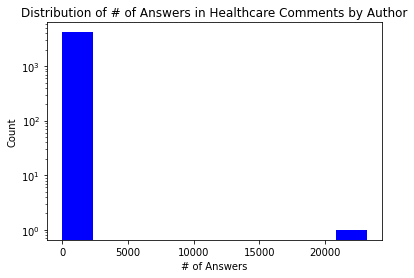

In [0]:
plt.hist("count", data = author_dist, log = True, color = "blue")
plt.xlabel("# of Answers")
plt.ylabel("Count")
plt.title(f"Distribution of # of Answers in Healthcare Comments by Author")
plot_fpath = os.path.join(PLOT_DIR, f'author_dist_comments_healthcare.png')
plt.savefig(plot_fpath)
plt.show()

This graph shows a problematic element of the healthcare subreddit. The vast majority of authors comment relatively few number of times, but one author dominated the subreddit with over 20,000 comments (out of 41,000 total).

In [0]:
# write data to csv
csv_fpath = os.path.join(CSV_DIR, f'author_dist_comments_healthcare.csv')
author_dist.to_csv(csv_fpath)

## Business Question 3
`Business Goal:` Examine controversiality as it relates to healthcare. For instance, determining which words are most associated with high controversiality score can help identify potentially polarizing or incindiary information. For example, posts discussing health privacy (medical data/HIPPA violations), discrimination, anecdotal trauma/negative experiences are examples of potentially divisive topics. This information might be useful for organizations that are interested in tracking information censorship. For example, say there is an organization who's mission is to ensure that platforms protect free speach. Suppose they suspect that reddit is supressing controversy (and therefore limiting diversity of responses), these topics might be the ones they are most interested in tracking. 

`Technical Proposal:` Tokenizing words found in posts with high controversiality scores. Performing sentiment analysis and topic modelling and/or named entity recognition can help display which entities are the most controversial and why. Present results as a series of tables and graphs showing the most controversial entities. Look for patterns that will help draw insights about health-related controversy.

In [0]:
controversy_dist = healthcare_com.select(col('controversiality')).toPandas()

##### Figure 3 - Don't count towards overall count - the table is what will be used

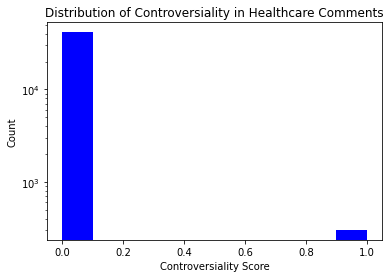

In [0]:
plt.hist("controversiality", data = controversy_dist, log = True, color = "blue")
plt.xlabel("Controversiality Score")
plt.ylabel("Count")
plt.title(f"Distribution of Controversiality in Healthcare Comments")
plot_fpath = os.path.join(PLOT_DIR, f'controversiality_dist_comments_healthcare.png')
plt.savefig(plot_fpath)
plt.show()


This graph shows a problematic element of the controversiality variable. Instead of a continuous variable, it is only 0 or 1 so determining the meaning of theis variable is quite challenging.

In [0]:
# Write data to csv
csv_fpath = os.path.join(CSV_DIR, f'controversiality_dist_comments_healthcare.csv')
controversy_dist.to_csv(csv_fpath)

In [0]:
import pyspark.sql.functions as F
# Exploring controversiality summary by getting mean, Q25, median, Q75
health_controversy_summary = healthcare_com.agg(  
                                                F.mean(col('controversiality')).alias('mean'),
                                                F.expr("percentile(controversiality, array(0.25))")[0].alias('Q25'),
                                                F.expr('percentile(controversiality, array(0.50))')[0].alias('median'),
                                                F.expr('percentile(controversiality, array(0.75))')[0].alias('Q75')).toPandas().rename(index = {0:"controversiality"})  


##### Table 1

In [0]:
health_controversy_summary

,mean,Q25,median,Q75
controversiality,0.00722,0.0,0.0,0.0


This table further elucidates the point that this variable is relatively useless, with only .7% of posts garnering a score of 1 for controversiality.

In [0]:
csv_fpath = os.path.join(CSV_DIR, f'healthcare_controversy_summary.csv')
health_controversy_summary.to_csv(csv_fpath)

## Business Question 4:

`Business Goal:` Determine the trends of public discourse related to healthcare with respect to a specific time of year. Using this information for marketing efforts, program rollouts, etc. can help to make these initiatives more aligned with periods of interest.

`Technical Proposal:` The healthcare subreddit is a place for general healtchare questions seeking answers from the Reddit community. As a result, activity trends should represent a sample of general activity related to healthcare discourse throughout the year. Date variables will be created and then activity levels grouped by month will be computed.

In [0]:
import pyspark.sql.functions as F

## Retreived_on is the date variable - and does have missing values so must get rid of them
dates_sub = healthcare_sub.na.drop(subset = "retrieved_on")
dates_com = healthcare_com.na.drop(subset = "retrieved_on")

In [0]:
dates_sub = dates_sub.withColumn('timestamp', F.from_unixtime(F.col('retrieved_on'))).withColumn("timestamp",F.to_timestamp(F.col('timestamp'), "yyyy-MM-dd HH:mm:ss"))
dates_com = dates_com.withColumn('timestamp', F.from_unixtime(F.col('retrieved_on'))).withColumn("timestamp",F.to_timestamp(F.col('timestamp'), "yyyy-MM-dd HH:mm:ss"))

In [0]:
# Check min and max date for subs
dates_sub.agg(F.min('timestamp'), F.max('timestamp')).toPandas()

,min(timestamp),max(timestamp)
0,2022-02-19 03:08:33,2022-09-12 06:39:36


In [0]:
# Check min and max date for comments
dates_com.agg(F.min('timestamp'), F.max('timestamp')).toPandas()

,min(timestamp),max(timestamp)
0,2021-05-04 20:32:58,2022-09-10 03:00:39


In [0]:
# Make variables for months
dates_sub = dates_sub.withColumn("month", F.month(F.col('timestamp')))
dates_com = dates_com.withColumn("month", F.month(F.col('timestamp')))

In [0]:
# Have to filter to greater than 2 because data collection starts on 2/19, so we only take data from March on
subs_by_month = dates_sub.filter(F.col("month") > 2).groupBy("month").count().orderBy(F.col("month"))
# Must filter comments to 2022 and apply the month filter to keep date ranges consistent between subs and comments data
coms_by_month = dates_com.filter((F.year(F.col("timestamp")) == "2022") & (F.col("month") > 2)).groupBy("month").count().orderBy(F.col("month"))

In [0]:
subs_by_month.show()

+-----+-----+
|month|count|
+-----+-----+
|    5| 2826|
|    6|11951|
|    7| 1547|
|    8| 1562|
|    9| 1411|
+-----+-----+



In [0]:
coms_by_month.show()

+-----+-----+
|month|count|
+-----+-----+
|    3| 2281|
|    4| 1872|
|    5| 3327|
|    6| 9290|
|    7| 2226|
|    8| 2723|
|    9| 2085|
+-----+-----+



In [0]:
## Subs was missing data for March and April so I will insert 0's there
sbm = subs_by_month.select(F.col("count")).toPandas()['count'].tolist()
sbm.insert(0,0)
sbm.insert(0,0)
cbm = coms_by_month.select(F.col("count")).toPandas()['count'].tolist()

##### Figure 4

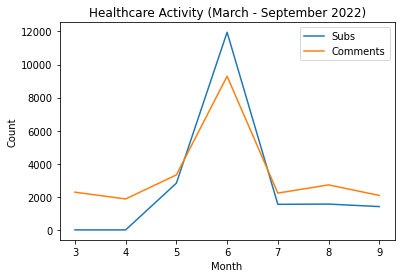

In [0]:
import matplotlib.pyplot as plt
x = [3,4,5,6,7,8,9]
plt.plot(x, sbm, label = "Subs")
plt.plot(x, cbm, label = "Comments")
plt.title("Healthcare Activity (March - September 2022)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plot_fpath = os.path.join(PLOT_DIR, f'activity_dist_healthcare.png')
plt.savefig(plot_fpath)
plt.show()

This graph shows the activity trends overtime on this subreddit. One thing of note is that the submission activity actually outways the comments activity during peak traffic. This could point to a conclusion that questions in healthcare are often more readily generated then answers, but further data would be needed to back up this claim.

In [0]:
csv_fpath = os.path.join(CSV_DIR, f'activity_dist_sub_healthcare.csv')
subs_by_month.select(F.col("count")).toPandas().to_csv(csv_fpath)
csv_fpath = os.path.join(CSV_DIR, f'activity_dist_com_healthcare.csv')
coms_by_month.select(F.col("count")).toPandas().to_csv(csv_fpath)

## Business Question 5: 

`Business Goal:`What hot button topics in healthcare are most discussed and how can they help us understand the most pressing health concerns? This could be helpful for  insurance companies when considering what should be covered in new health plans/packages. It could also be useful for politicians on the campaign trail who want to understand the main concerns of their constituents with respect to public health. 

`Technical Proposal 5:` 
Regex to query topics, find counts for number of submissions per topic and number of comments per topic, conduct sentiment analysis for each topics and look at proportions of positive to negative in each subcategory. This approach will help us identify *what* topics are the most talked about and *how* theyre being discussed.

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col,isnan, when, count

import pyspark.sql.functions as f
PH_sub = spark.read.parquet("/FileStore/PublicHealth_subs2")
PH_com = spark.read.parquet("/FileStore/PublicHealth_coms2")

In [0]:
pub_health_com_df = PH_com.select(col("body"))

pub_health_com_df = pub_health_com_df.withColumn("reproductive_rights", when(col('body')\
        .rlike("(?i)abortion|(?i)reproductive|(?i)pro life|(?i)pro choice|(?i)fetus|(?i)pro-choice|(?i)pro-life|(?i)women's rights|(?i)rape|(?i)incest|(?i)birth control|(?i)contraception"), True) \
        .otherwise(False))\
        .withColumn("covid", when(col('body')\
        .rlike('(?i)chronic|(?i)communicable|(?i)covid|(?i)corona|(?i)contagious|(?i)virus|(?i)mask|(?i)masks|(?i)masker|(?i)anti-masks|(?i)masking|(?i)covid-19'), True)\
        .otherwise(False))\
        .withColumn("vaccines", when(col('body')\
        .rlike('(?i)anti-vax|(?i)anti vax|(?i)vax|(?i)microchip|(?i)micro-chip|(?i)vaccine|(?i)pfizer|(?i)moderna|(?i)astrazeneca|(?i)johnson and johnson|(?i)j&j|(?i)jj'), True)\
        .otherwise(False))\
        .withColumn("substances", when(col('body')\
        .rlike('(?i)drug abuse|(?i)alcohol|(?i)marijuana|(?i)weed|(?i)addiction|(?i)LSD|(?i)opioid|(?i)nicotine|(?i)recovery|(?i)rehab|(?i)pot|(?i)relapse|(?i)vape|(?i)tobacco|(?i)cigar|(?i)cigarette|(?i)fentanyl|(?i)cocaine|(?i)crack|(?i)xanax|(?i)codeine'), True)
        .otherwise(False))\
        .withColumn("mental_health", when(col('body')\
        .rlike('(?i)psych|(?i)mental health|(?i)depression|(?i)anxiety|(?i)bipolar|(?i)bpd|(?i)ptsd|(?i)schizophrenia|(?i)mpd|(?i)therapy'), True)
        .otherwise(False))\
        .withColumn("costs", when(col('body')\
        .rlike('(?i)inflation|(?i)copay|(?i)co-pay|(?i)insurance|(?i)out of pocket|(?i)payment|(?i)hsa|(?i)expensive'), True)
        .otherwise(False))


In [0]:
pub_health_com_df.show()

+--------------------+-------------------+-----+--------+----------+-------------+-----+
|                body|reproductive_rights|covid|vaccines|substances|mental_health|costs|
+--------------------+-------------------+-----+--------+----------+-------------+-----+
|I would focus mor...|              false|false|   false|     false|        false|false|
|I've been hearing...|              false|false|   false|     false|        false|false|
|What would be the...|              false|false|   false|     false|        false|false|
|I was only lookin...|              false|false|   false|     false|        false|false|
|I’ve been doing s...|              false|false|   false|      true|        false|false|
|Lmao "if you want...|              false|false|   false|     false|        false|false|
|I (an MPH) left m...|              false| true|   false|     false|        false|false|
|Requests for advi...|              false|false|   false|     false|        false|false|
|You'll be fine, I...

##### Table 2

In [0]:
rr = pub_health_com_df.groupby('reproductive_rights').count().toPandas()['count'].tolist()
covid = pub_health_com_df.groupby('covid').count().toPandas()['count'].tolist()
vax = pub_health_com_df.groupby('vaccines').count().toPandas()['count'].tolist()
substances = pub_health_com_df.groupby('substances').count().toPandas()['count'].tolist()
mental = pub_health_com_df.groupby('mental_health').count().toPandas()['count'].tolist()
costs = pub_health_com_df.groupby('costs').count().toPandas()['count'].tolist()

import pandas as pd
# build df with counts of comments that mention terms from each hotbutton topic
regex_df = pd.DataFrame({'reproductive_rights': rr, 'covid': covid, "vaccines": vax, "substances": substances, "mental_health": mental, "costs": costs})
regex_df = regex_df.rename(index = {0:"True", 1: "False"})  
regex_df

,reproductive_rights,covid,vaccines,substances,mental_health,costs
True,160,2266,968,1099,1160,786
False,44511,42405,43703,43572,43511,43885


The table above shows that, from the hotbutton topics we have chosen to explore, covid-related terms appear most frequently in the public health subreddit comments. This is followed by mental health terms, substances terms, vaccines terms, costs terms, and reproductive rights terms (in decending order).

In [0]:
# save df to csv
csv_fpath = os.path.join(CSV_DIR, f'hot_button_regex.csv')
regex_df.to_csv(csv_fpath)

## Business Question 6

`Business Goal:`Determine how sentiment towards abortion rights was impacted over the past few months. In other words, how did the public respond to the Supreme Court overturning Roe v. Wade? Understanding general public sentiment (or even the sentiment of particular groups of users) would allow businesses to target advertisements or for politicians to tailor their campaigns to align with certain groups.

`Technical Proposal:` Sentiment analysis on posts (and/or comments) can be evaluated using out-of-box sentiment analysis models by first cleaning the data and selecting a sentiment analysis learning model to process the data. Results from the sentiment analysis will be visualized. Sentiment can also be analyzed by labeling the submissions as ProLife or ProChoice (from their respective subreddits) and we can then apply classifier algorithms to understand whether the sentiment of ProLife and ProChoice submissions are similar to their respective subreddits.

In [0]:
# Prepare the Reproductive Rights dataset. Contains data from 3 subreddits: roevwade2022, prolife, and prochoice.
# Read the data
RR_sub = spark.read.parquet("/FileStore/ReproductiveRightsv2_subs")
RR_com = spark.read.parquet("/FileStore/ReproductiveRightsv2_coms")

In [0]:
# Prepare the data to create a time plot of the submissions and posts for Reproductive Rights
import pyspark.sql.functions as F

# Retreived_on is the date variable - and does have missing values so must get rid of them
dates_sub = RR_sub.na.drop(subset = "retrieved_on")
dates_com = RR_com.na.drop(subset = "retrieved_on")

# Create date timestamp
dates_sub = dates_sub.withColumn('timestamp', F.from_unixtime(F.col('retrieved_on'))).withColumn("timestamp",F.to_timestamp(F.col('timestamp'), "yyyy-MM-dd HH:mm:ss"))
dates_com = dates_com.withColumn('timestamp', F.from_unixtime(F.col('retrieved_on'))).withColumn("timestamp",F.to_timestamp(F.col('timestamp'), "yyyy-MM-dd HH:mm:ss"))

# Make variables for months
dates_sub = dates_sub.withColumn("month", F.month(F.col('timestamp')))
dates_com = dates_com.withColumn("month", F.month(F.col('timestamp')))

# Have to filter to greater than 2 because data collection starts on 2/19, so we only take data from March on
subs_by_month = dates_sub.filter(F.col("month") > 2).groupBy("month").count().orderBy(F.col("month"))
# Must filter comments to 2022 and apply the month filter to keep date ranges consistent between subs and comments data
coms_by_month = dates_com.filter((F.year(F.col("timestamp")) == "2022") & (F.col("month") > 2)).groupBy("month").count().orderBy(F.col("month"))

In [0]:
# Check counts by month
subs_by_month.show()
coms_by_month.show()

+-----+-----+
|month|count|
+-----+-----+
|    5| 5744|
|    6|10895|
|    7| 4636|
|    8| 4268|
|    9| 2075|
+-----+-----+

+-----+------+
|month| count|
+-----+------+
|    3| 55659|
|    4| 52596|
|    5| 39511|
|    6|176331|
|    7| 62676|
|    8| 64583|
|    9| 37528|
+-----+------+



In [0]:
# Subs was missing data for March and April so I will insert 0's there
sbm = subs_by_month.select(F.col("count")).toPandas()['count'].tolist()
sbm.insert(0,0)
sbm.insert(0,0)
cbm = coms_by_month.select(F.col("count")).toPandas()['count'].tolist()

##### Figure 5

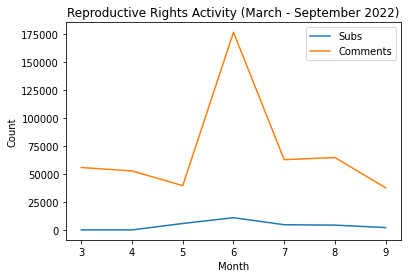

In [0]:
import matplotlib.pyplot as plt
x = [3,4,5,6,7,8,9]
plt.plot(x, sbm, label = "Subs")
plt.plot(x, cbm, label = "Comments")
plt.title("Reproductive Rights Activity (March - September 2022)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plot_fpath = os.path.join(PLOT_DIR, f'activity_ReproductiveRights.png')
plt.savefig(plot_fpath)
plt.show()

In [0]:
csv_fpath = os.path.join(CSV_DIR, f'activity_ReproductiveRights_sub.csv')
subs_by_month.select(F.col("count")).toPandas().to_csv(csv_fpath)
csv_fpath = os.path.join(CSV_DIR, f'activity_ReproductiveRights_com.png.csv')
coms_by_month.select(F.col("count")).toPandas().to_csv(csv_fpath)

In the chart above we can see that activity across the reproductive rights reddits increased over the time frame we have displayed. Most notably, comments during the month of June skyrocketed because that was around the time that the Supreme Court's draft to overturn Roe v. Wade was leaked and published in Politico.

How did activity vary across the varios subreddits? Let's break our data down further.

In [0]:
# Prepare the data to create a time plot of the submissions and posts for Reproductive Rights
# By splitting the data according to subreddit
import pyspark.sql.functions as F

# Retreived_on is the date variable - and does have missing values so must get rid of them
dates_com = RR_com.na.drop(subset = "retrieved_on") # Want the subreddit column

# Create date timestamp
dates_com = dates_com.withColumn('timestamp', F.from_unixtime(F.col('retrieved_on'))).withColumn("timestamp",F.to_timestamp(F.col('timestamp'), "yyyy-MM-dd HH:mm:ss"))

# Make variables for months
dates_com = dates_com.withColumn("month", F.month(F.col('timestamp')))

# Must filter comments to 2022 and apply the month filter to keep date ranges consistent between subs and comments data
coms_by_month = dates_com.filter((F.year(F.col("timestamp")) == "2022")).groupBy(["month","subreddit"]).count().orderBy(F.col("month"))

In [0]:
# Let's look at these subreddits and month counts
coms_by_month.show()

+-----+------------+------+
|month|   subreddit| count|
+-----+------------+------+
|    2|     prolife| 55389|
|    2|   prochoice| 11513|
|    3|     prolife| 45670|
|    3|   prochoice|  9989|
|    4|     prolife| 43785|
|    4|   prochoice|  8811|
|    5|   prochoice|  8504|
|    5|     prolife| 31007|
|    6|roevwade2022|  3080|
|    6|     prolife|142931|
|    6|   prochoice| 30320|
|    7|roevwade2022|  1810|
|    7|   prochoice| 16458|
|    7|     prolife| 44408|
|    8|   prochoice| 18938|
|    8|roevwade2022|   541|
|    8|     prolife| 45104|
|    9|   prochoice| 11812|
|    9|     prolife| 25674|
|    9|roevwade2022|    42|
+-----+------------+------+



In [0]:
# Let's prepare the data for month count for each subreddit
roe = coms_by_month.filter(F.col("subreddit") == "roevwade2022").select(F.col("count")).toPandas()['count'].tolist()
# Roe v wade subreddit has no counts for February - May so have to insert 0's
roe.insert(0,0)
roe.insert(0,0)
roe.insert(0,0)
roe.insert(0,0)
prolife = coms_by_month.filter(F.col("subreddit") == "prolife").select(F.col("count")).toPandas()['count'].tolist()
prochoice = coms_by_month.filter(F.col("subreddit") == "prochoice").select(F.col("count")).toPandas()['count'].tolist()

##### Figure 6

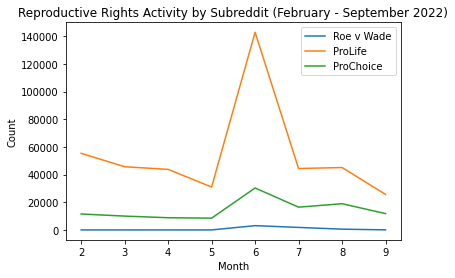

In [0]:
x = [2,3,4,5,6,7,8,9]
plt.plot(x, roe, label = "Roe v Wade")
plt.plot(x, prolife, label = "ProLife")
plt.plot(x, prochoice, label = "ProChoice")
plt.title("Reproductive Rights Activity by Subreddit (February - September 2022)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plot_fpath = os.path.join(PLOT_DIR, f'activity_ReproductiveRightsBySubreddit.png')
plt.savefig(plot_fpath)
plt.show()

In [0]:
csv_fpath = os.path.join(CSV_DIR, f'activity_ReproductiveRightsBySubreddit.csv')
coms_by_month.select(F.col("count")).toPandas().to_csv(csv_fpath)

In the chart above we can see how comments across all subreddits that make up our Reproductive Rights Dataset (roevwade2022, prolife, and prochoice) increased after the Supreme Court leak in May of this year. With the ProLife subreddit specifically, the number of comments skyrocketed. Without further analysis we cannot say what the sentiment was but we can begin to form hypotheses about what topics and feelings were being expressed during the time frame. The above charts reveal that sentiment anaylsis over the past few months is worthwhile because there was a surge in activity and engagement over the past year.

## Business Question 7

`Business Goal:` Determine whether a user’s stance on women’s reproductive rights is indicative of their stance on other high-controversy topics such as gun control. Identifying correlations between controversial beliefs reveals how approaches to and opinions around healthcare topics (such as reproductive rights) indicate other approaches and opinions towards other areas of life. Again, this information can be used for advertising purposes, fundraising campaigns, or political agendas. 

`Technical Proposal:` Submissions and comments can first be processed to determine whether other topics (such as gun control) are mentioned on these subreddits (which are specifically catered for reproductive rights). A list of authors can then be generated from our reproductive rights data and can be cross referenced with authors of posts on gun-related subreddits. A network of high-controversy subreddits can then be constructed to determine whether posting/commenting on one subreddit makes posting/commenting on another more or less likely.

In [0]:
# Prepare the Reproductive Rights dataset. Contains data from 3 subreddits: roevwade2022, prolife, and prochoice.
# Read the data
RR_sub = spark.read.parquet("/FileStore/ReproductiveRightsv2_subs")
RR_com = spark.read.parquet("/FileStore/ReproductiveRightsv2_coms")

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col,isnan, when, count
import pyspark.sql.functions as f

# Let's create new columns for certain controversial topics/words
# First, let's only work with the relevant content of the posts with title and body.
RR_sub_df = RR_sub.select("subreddit", "title", f.lower("title"))
RR_com_df = RR_com.select("subreddit", "body", f.lower("body"))

# Topic: Abortion
# This is a major proponent of reproductive rights and we would expect the frequency of this word to appear frequently
RR_sub_df = RR_sub_df.withColumn("Abortion", col('lower(title)').rlike("(?i)abortion"))
RR_com_df = RR_com_df.withColumn("Abortion", col('lower(body)').rlike("(?i)abortion"))

# Topic: Guns
# Though this has nothing to do with reproductive rights, this word has appeared throughout the subreddits
RR_sub_df = RR_sub_df.withColumn("Guns", col('lower(title)').rlike("(?i)gun|(?i)guns|(?i)nra|(?i)firearms|(?i)firearm"))
RR_com_df = RR_com_df.withColumn("Guns", col('lower(body)').rlike("(?i)gun|(?i)guns|(?i)nra|(?i)firearms|(?i)firearm"))

# Topic: Religion
# Healthcare and religion are often very interwined in today's world
RR_sub_df = RR_sub_df.withColumn("Religion", col('lower(title)').rlike("(?i)religion|(?i)god|(?i)sin|(?i)jesus|(?i)holy|(?i)pray|(?i)sinner|(?i)hell|(?i)devil|(?i)church|(?i)bible"))
RR_com_df = RR_com_df.withColumn("Religion", col('lower(body)').rlike("(?i)religion|(?i)god|(?i)sin|(?i)jesus|(?i)holy|(?i)pray|(?i)sinner|(?i)hell|(?i)devil|(?i)church|(?i)bible"))

In [0]:
import pandas as pd
# Now that we have our data prepared. Let's visualize counts of these words across submissions and comments.

# FOR SUBMISSIONS
# Abortion
abortion_sub = RR_sub_df.filter((F.col("Abortion") == True)).groupBy("subreddit").count().orderBy(col("subreddit")).toPandas()['count'].tolist()
abortion_sub_sz = RR_sub_df.groupBy("subreddit").count().orderBy(col("subreddit")).toPandas()['count'].tolist()
abortion = [i / j for i, j in zip(abortion_sub, abortion_sub_sz)]

# Guns
guns_sub = RR_sub_df.filter((F.col("Guns") == True)).groupBy("subreddit").count().orderBy(col("subreddit")).toPandas()['count'].tolist()
guns_sub_sz = RR_sub_df.groupBy("subreddit").count().orderBy(col("subreddit")).toPandas()['count'].tolist()
guns = [i / j for i, j in zip(guns_sub, guns_sub_sz)]

# Religion
religion_sub = RR_sub_df.filter((F.col("Religion") == True)).groupBy("subreddit").count().orderBy(col("subreddit")).toPandas()['count'].tolist()
religion_sub_sz = RR_sub_df.groupBy("subreddit").count().orderBy(col("subreddit")).toPandas()['count'].tolist()
religion = [i / j for i, j in zip(religion_sub, religion_sub_sz)]

In [0]:
# Create a dataframe based on the proportions that we calculated 
df = pd.DataFrame({"Abortion": abortion, "Guns": guns, "Religion": religion}, index=["prochoice", "prolife", "roevwade2022"])
df_t = df.T # Transpose the df to switch colms and rows
print(df_t.head())

          prochoice   prolife  roevwade2022
Abortion   0.330012  0.220117      0.181818
Guns       0.002805  0.002852      0.009324
Religion   0.055137  0.047465      0.055944


##### Figure 7

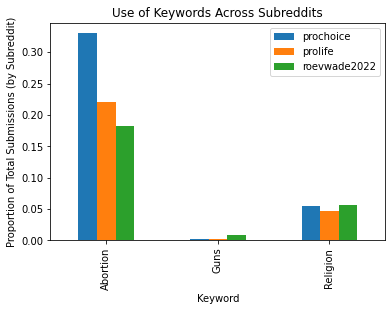

In [0]:
df_t.plot(kind="bar")
plt.title("Use of Keywords Across Subreddits")
plt.xlabel("Keyword")
plt.ylabel("Proportion of Total Submissions (by Subreddit)")
plot_fpath = os.path.join(PLOT_DIR, f'KeywordsBySubreddit.png')
plt.savefig(plot_fpath)
plt.show()

In [0]:
csv_fpath = os.path.join(CSV_DIR, f'KeywordsBySubreddit.csv')
df_t.to_csv(csv_fpath)

From the chart above we can see how different keywords are used across submissions by varios subreddit. Each bar represents the percentage of submissions that include the specified keyword for that subreddit. For example, more than 30% of the prochoice subreddit submissions include the word "abortion" while only ~20% of prolife subreddit submissions discuss abortion. We can also see that "guns" isn't often used in submissions across any subreddit which is interesting because in real life we see that different opinions bleed into different parts of our lives. 

This visual can also be expanded for further analysis if we would like. For example, we could search for more keywords. We could also adapt this code to visualize the same analysis for subreddit comments rather than submission titles. Finally, we could add more filters to see how many submissions or comments discuss abortion AND religion and look for specific overlaps of keywords.

## Business Question 8:
`Business Goal:` Identify the categories of emergencies that are most prevalent in emergency services. This information is relevant because the majority of healthcare costs come from patients admitted in emergency rooms. Identifying the most common reasons for these emergencies would help implement targeted prevention measures to reduce these emergencies, while also reducing healthcare costs imposed on the healthcare system.

`Technical Proposal:` Using the text in the **emergencymedicine** subreddit, we will extract the causes for emergency room visits. This can be accomplished by applying regex and creating Boolean variables. In order to find the relevant diagnoses, we will join the **emergencymedicine** subreddit data with external data that provides a list of emergency room diagnoses (this data can be found in *data/csv/emergency_room_diagnoses_2021.csv*). New Boolean variables can then be added to determine which of these diagnoses can be identified in the **emergencymedicine** subreddit, thus identifying the cause of the emergency room visit.

In [0]:
ems_sub = spark.read.parquet("/FileStore/ems_subs")
ems_com = spark.read.parquet("/FileStore/ems_coms")

In [0]:
ems_sub.printSchema()

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

In [0]:
print(ems_sub.count())

3739


In [0]:
ems_com.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)

+--------------------+--------------+----------------------+-----------------+--------------------+--------+------------

In [0]:
print(ems_com.count())

49182


In [0]:
import pandas as pd
# ------------------------------------------------------------------------------------------------------------------------------------ #
#
# IMPORT THE FILE OF EMERGENCY ROOM DIAGNOSES
#
# ------------------------------------------------------------------------------------------------------------------------------------ #

diagnoses = pd.read_csv('data/csv/emergency_room_diagnoses_2021.csv')
top_diagnoses = diagnoses.sort_values('TotalDiag').tail(75).groupby('DiagnosisDesc').sum('TotalDiag')

# ------------------------------------------------------------------------------------------------------------------------------------ #
#
# REDEFINE NAMES FOR THE DIAGNOSES TO FIT REDDIT DISCOURSE
#
# ------------------------------------------------------------------------------------------------------------------------------------ #
top_diagnoses['new_diag'] = top_diagnoses.index

new_diags = ['digestive tract', 'upper respiratory infection', 'allergy to narcotic', 'allergy to antibiotic', 'allergy to drugs', 'allergy to penicillin', 'anemia', 'anxiety', 'atherosclerosis', 'coronary artery heart disease', 'chest pain', 'chronic obstructive pulmonary disease', 'constipation', 'exposure to COVID-19', 'cough', 'COVID-19', 'dehydration', 'diarrhea', 'dizziness', 'immunization', 'stomach pain', 'hypertension', 'fever', 'gastro-esophageal reflux disease', 'headache', 'heart failure', 'homelessness', 'hyperlipidemia', 'hypothyroidism', 'anticoagulants', 'aspirin', 'insulin', 'hypoglycemic', 'lower back pain', 'depression', 'nausea', 'nausea with vomiting', 'addiction to nicotine', 'addiction', 'obesity', 'other chest pain', 'other chronic pain', 'drug therapy', 'postprocedural', 'nicotine dependence', 'transient ischemic attack', 'hypercholesterolemia', 'shortness of breath', 'collapse', 'tachycardia', 'type 2 diabetes with chronic kidney disease', 'type 2 diabetes', 'abdominal pain', 'uncomplicated asthma', 'atrial fibrillation', 'head injury', 'urinary tract infection', 'unspecified vomiting', 'weakness']

replaced = top_diagnoses.replace(list(top_diagnoses['new_diag']), new_diags)
er_diagnoses = replaced['new_diag']


In [0]:
from pyspark.sql.functions import col,isnan, when, count
import pyspark.sql.functions as f

# ------------------------------------------------------------------------------------------------------------------------------------ #
# 
# IDENTIFY IF ANY WORDS IN THE TEXT ARE IN THE LIST OF DIAGNOSES
#
# ------------------------------------------------------------------------------------------------------------------------------------ #
diagnoses_str = "(?i)" + "|(?i)".join(new_diags)
ems_sub_df = ems_com.withColumn('diagnosed', when(col('body').rlike(diagnoses_str), True))

In [0]:
import re
from pyspark.sql.functions import regexp_extract
# ------------------------------------------------------------------------------------------------------------------------------------ #
#
# IF SO, THEN ADD THE MATCHED WORD TO A COLUMN CALLED "EMS_TOPIC" 
#
# ------------------------------------------------------------------------------------------------------------------------------------ #
ems_labeled = ems_sub_df.withColumn('ems_topic', regexp_extract(col('body'), diagnoses_str, 0))
ems_labeled.show()

In [0]:
ems_to_df = ems_labeled.toPandas()
ems_labeled_csv = os.path.join(CSV_DIR, f'ems_labeled_csv.csv')
ems_to_df.to_csv(ems_labeled_csv)

In [0]:
# ------------------------------------------------------------------------------------------------------------------------------------ #
#
# COUNT EACH EMS_TOPIC
#
# ------------------------------------------------------------------------------------------------------------------------------------ #
ems_counts = ems_labeled.select(col('ems_topic'))
all_topics = ems_counts.where(col('ems_topic') != "")

all_topics.groupby('ems_topic').count().show()

+-------------------+-----+
|          ems_topic|count|
+-------------------+-----+
|        tachycardia|   50|
|            insulin|   77|
|           covid-19|   13|
|             Nausea|    1|
|      heart failure|   23|
|        head injury|   20|
|     anticoagulants|    5|
|Shortness of breath|    2|
|       HYPERtension|    1|
|         chest pain|  219|
|shortness of breath|    9|
|       constipation|   17|
|           collapse|   61|
|           COVID-19|   38|
|          addiction|   88|
|           diarrhea|   21|
|         depression|   48|
|       immunization|    8|
|              fever|  148|
|          dizziness|   12|
+-------------------+-----+
only showing top 20 rows



In [0]:
# ------------------------------------------------------------------------------------------------------------------------------------ #
#
# CREATE SUMMARY TABLE FOR COUNTS OF EACH EMS_TOPIC
#
# ------------------------------------------------------------------------------------------------------------------------------------ #
data = all_topics.groupby('ems_topic').count().toPandas().to_dict()

##### Table 3

In [0]:
# build df with counts of comments that mention terms from each hotbutton topic
pd.set_option('display.max_rows', None)
ems_com_summary = pd.DataFrame(data)

ems_com_summary = ems_com_summary.apply(lambda x: x.astype(str).str.upper())
ems_com_summary = ems_com_summary.groupby('ems_topic').sum()

ems_com_summary_sorted = ems_com_summary.sort_values('count', ascending = False)
ems_com_summary_sorted

,count
ems_topic,
HEADACHE,942
SHORTNESS OF BREATH,921
ADDICTION,8819
ATRIAL FIBRILLATION,81
IMMUNIZATION,81
INSULIN,7751
HOMELESSNESS,72
COUGH,6541
NAUSEA,581


The summary table (Table 3) above illustrates the counts of common emergency room diagnoses that were the subject of Emergency Medicine subreddits. Based on the data, the most prevalent reason for emergency room visits is chest pain, with 21910 diagnoses. Unsurprisingly, COVID-19 is a relatively close second, while the rest of the emergency room diagnoses appear to be symptoms associated with most chronic diseases. Thus, the table above confirms that the majority of hospital visits are actually a result of bad health, as opposed to disastrous events.

## Business Question 9:
`Business Goal:`  Collect discourse about prescription medicines (ie. accessibility, cost, demographics) in order to identify:
1. Which medicines are most effective, meaning they should continue to be made by pharmaceuticul companies, and perhaps covered by insurance companies.
2. Which medicines are most expensive, and thus should be covered more by insurance. 
3. Which medications (ie. antidepressants, anti-anxiety, etc.) are most prevalent, to see which medical conditions are treated the most frequently. Identifying the category of disease that the medication treats will help identify areas in medicine that require more pharmaceutical research.

`Technical Goal:`  We will also use previously created sentiment analysis models to determine whether people are pleased or displeased with the medications they are talking about. Use regex to extract medication names, the conditions they are used for, and perhaps discussions on whether they are expensive or not. An external dataset (found in *data/csv/drug_uses.csv*) can be used to connect the medication name with category of diseases that the medication is used to treat.

##Business Question 10: 

`Business Goal:` What organizations, people, and locations are mentioned in the public health space? Identifying notable entities would be imperative to funding initiatives for groups that want to strategically fund public health issues. For example, if a philanthropic organization looking to target funding to healthcare institutions (like planned parenthood, clinics, etc) in a specific state, they might look at which states appear most in these posts. Similarly, if they wanted to financially back a politician/researcher/doctor/leader to help further their work public health, they might look at which people appear to be most prominent in the healthcare space. Essentially, this would be a research tool to aid institutions/individuals in understanding the key entities in healthcare (whether it be person, place, or org).  


`Technical Proposal:` Use spaCy's NER package to identify notable entities in the healthcare domain. We would extract entities from the public health subreddit that are classified by spaCy as ORG (organization),  PER (person), or LOC/GPE (location/geopolitical entity) and analyze these categories individually. Once we have the data for these three classifications, we calculate volume/frequency of mentions and would perform sentiment analysis on the posts containing each entity type, respectively, to determine if the entity is being discussed in a positive or negative manner. For example, if we find that Donald Trump and Anthony Fauci are mentioned in the posts in our in our PER data subset, we would explore the sentiment of the surrounding context where each entity appears to understand the valence (pos/neg). Once we have pos or neg valence classifications for each mention of a person, we can find the overall sentiment ratio and volume of mentions across all posts where that individual appears. The same approach applies for LOC/GPE and ORG. One interesting thought for visualizing the location entities is to extract them, map them to their geo coordinates (lat long), and visualize them on a geospatial map.